In [48]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer,text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.callbacks import Callback ,EarlyStopping,ModelCheckpoint
from sklearn.metrics import precision_score, recall_score,accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [49]:
df = pd.read_csv(r"C:\Users\admin\Desktop\Major project\dataset\cleanTestDataOne.csv")

In [50]:
X=df['text'].astype(str)
X[2]

'sources    zawe ashton on lapland —'

In [51]:

# X=['You motherfucker go and fuck youself']
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X = pad_sequences(sequences, maxlen=100)

In [52]:
import pickle
with open(r'C:\Users\admin\Desktop\Major project\dataset\modelGRUBidirectionalGlove.pkl', 'rb') as f:
  pickle_data_GRU_bidirec_glove=pickle.load(f)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-04-16 15:33:40         2718
metadata.json                                  2023-04-16 15:33:40           64
variables.h5                                   2023-04-16 15:33:40     11453128
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\bidirectional
......vars
...layers\bidirectional\backward_layer
......vars
...layers\bidirectional\backward_layer\cell
......vars
.........0
.........1
.........2
...layers\bidirectional\forward_layer
......vars
...layers\bidirectional\forward_layer\cell
......vars
.........0
.........1
.........2
...layers\bidirectional\layer
......vars
...layers\bidirectional\layer\cell
......vars
...layers\dense
......vars
.........0
.........1
...layers\embedding
......vars
.........0
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.......

In [53]:
pickle_data_GRU_bidirec_glove

{'data': {'loss': [0.3345572352409363,
   0.2585996389389038,
   0.23820167779922485,
   0.2207595258951187,
   0.20793753862380981,
   0.19241009652614594,
   0.17629507184028625,
   0.16187633574008942,
   0.14658915996551514,
   0.1273690015077591,
   0.11037807911634445],
  'accuracy': [0.8564010262489319,
   0.8950356841087341,
   0.9034826755523682,
   0.911652684211731,
   0.917191743850708,
   0.9223845601081848,
   0.9305545687675476,
   0.9369937181472778,
   0.9419095516204834,
   0.9509797096252441,
   0.9579035043716431],
  'precision': [0.8661260604858398,
   0.8997897505760193,
   0.9091419577598572,
   0.9166082739830017,
   0.9216235280036926,
   0.9257398247718811,
   0.933854341506958,
   0.9405277371406555,
   0.9467936158180237,
   0.9531098008155823,
   0.9613506197929382],
  'recall': [0.8430964946746826,
   0.8890735507011414,
   0.8965517282485962,
   0.9056917428970337,
   0.9119235277175903,
   0.918432354927063,
   0.9267414212226868,
   0.9329732656478882,


In [54]:
accuracy= sum(pickle_data_GRU_bidirec_glove['data']['accuracy'])/len(pickle_data_GRU_bidirec_glove['data']['accuracy'])
recall=sum(pickle_data_GRU_bidirec_glove['data']['recall'])/len(pickle_data_GRU_bidirec_glove['data']['recall'])
precision=sum(pickle_data_GRU_bidirec_glove['data']['precision'])/len(pickle_data_GRU_bidirec_glove['data']['precision'])
accuracy, recall,precision

(0.9204081296920776, 0.914882090958682, 0.9249695918776772)

In [55]:
length=len(pickle_data_GRU_bidirec_glove['data']['accuracy'])
f1=[]
for i in range(0,length):
  N=2*(pickle_data_GRU_bidirec_glove['data']['precision'][i]*pickle_data_GRU_bidirec_glove['data']['recall'][i])
  D=(pickle_data_GRU_bidirec_glove['data']['precision'][i]+pickle_data_GRU_bidirec_glove['data']['recall'][i])
  f1.append(N/D)
sum(f1)/length

0.9198912895751286

In [56]:
model=pickle_data_GRU_bidirec_glove['model']

In [57]:
model.predict(X)

4787/4787 [==============================] - 77s 16ms/step


array([[0.9998991 ],
       [0.998427  ],
       [0.06099216],
       ...,
       [0.99997854],
       [0.9999233 ],
       [0.9999271 ]], dtype=float32)

In [58]:
#!pip install matplotlib


In [59]:
y1=pickle_data_GRU_bidirec_glove['data']['loss']
x=list(range(1,len(pickle_data_GRU_bidirec_glove['data']['loss'])+1))
y2=pickle_data_GRU_bidirec_glove['data']['val_loss']



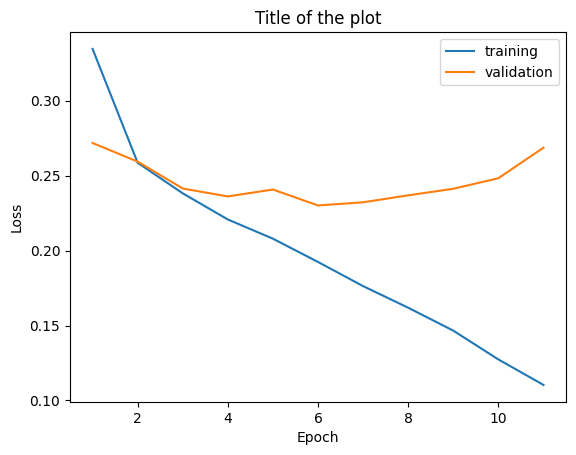

In [60]:
import matplotlib.pyplot as plt
plt.plot( x,y1, label='training')
plt.plot(x ,y2, label='validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Title of the plot')
plt.legend()
plt.show()




In [61]:
y1=pickle_data_GRU_bidirec_glove['data']['accuracy']
x=list(range(1,len(pickle_data_GRU_bidirec_glove['data']['accuracy'])+1))
y2=pickle_data_GRU_bidirec_glove['data']['val_accuracy']

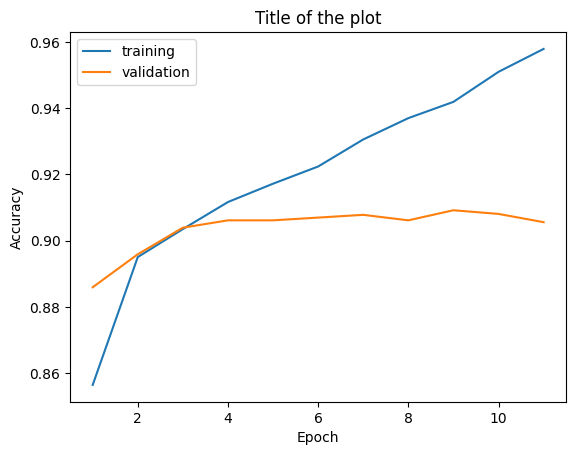

In [62]:
import matplotlib.pyplot as plt
plt.plot( x,y1, label='training')
plt.plot(x ,y2, label='validation')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Title of the plot')
plt.legend()
plt.show()




In [63]:
import pytesseract

import shutil

import os

import random

try:

    from PIL import Image

except ImportError:

    import Image

In [64]:
image_path_in_colab=r'C:\Users\admin\Desktop\Major project\testImage.png'

extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))



In [65]:
extractedInformation

'please feel free to go ahead and\nblock this address it will stop an\nentire country with 300 000\nregistered internet users from\nediting\n\x0c'

In [66]:

#!pip install contractions

In [67]:
import pandas as pd
import string
import contractions

def cleanData(text):
  
    return  contractions.fix(text.translate(str.maketrans('', '', string.punctuation)).replace('\n', ' ').strip()).lower()
 




In [68]:
data=cleanData(extractedInformation)
data

'please feel free to go ahead and block this address it will stop an entire country with 300 000 registered internet users from editing'

In [69]:

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts([data])
sequences = tokenizer.texts_to_sequences([data])
X = pad_sequences(sequences, maxlen=100)
X

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2,  3,  4,
         5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
        21, 22, 23, 24]])

In [70]:
predictNormal=model.predict(X)
predictNormal

1/1 [==============================] - 0s 26ms/step


array([[0.95360345]], dtype=float32)